In [1]:
import pandas as pd

lap2 = pd.read_csv(
    '../reference/Lap2AlphaBound.5KB.Regions.txt',
    sep = '\t',
    header = None,
    names = ['binid', 'chrom', 'start', 'end', 'lap2']
)
lap2_stringent = pd.read_csv(
    '../reference/Lap2AlphaBound.5KB.Regions.Stringent.txt',
    sep = '\t',
    header = None,
    names = ['binid', 'chrom', 'start', 'end', 'lap2']
)
lap2_stringent

binid chrom      start        end      lap2
0      BIN_481440    19    5840000    5845000  5.144890
1      BIN_481431    19    5795000    5800000  4.987150
2      BIN_104648     3  145645000  145650000  4.222580
3      BIN_326529    11  106780000  106785000  3.511590
4      BIN_481439    19    5835000    5840000  3.419010
...           ...   ...        ...        ...       ...
23947   BIN_67345     2  141245000  141250000  0.600029
23948  BIN_232107     8   19370000   19375000  0.600016
23949  BIN_176208     6   35060000   35065000  0.600013
23950  BIN_487056    19   33920000   33925000  0.600009
23951  BIN_181517     6   61605000   61610000  0.600003

[23952 rows x 5 columns]

In [2]:
conditions = ['WT', 'KO']
binsizes = [5000]

embeddings = {}
for condition in conditions:
    condition_data = {}
    for binsize in binsizes:
        key = f'{condition}_{binsize}'
        condition_data[binsize] = pd.read_hdf(
            f'../embeddings_genome.h5',
            key
        )
        
    embeddings[condition] = condition_data

conditions = ['WT', 'KO']
embeddings['WT'][5000]

UMAP1      UMAP2 louvain_0.1 chromhmm_5 chromhmm_6  \
1:3000000-3005000   -1.802115  11.628745          22         E2         E2   
1:3005000-3010000   -7.213926  15.012733          22         E2         E2   
1:3010000-3015000   -3.120484  14.282582          22         E2         E2   
1:3015000-3020000   -7.173028  15.141628          22         E2         E2   
1:3020000-3025000   -5.556630  18.414391          22         E2         E2   
...                       ...        ...         ...        ...        ...   
Y:90820000-90825000  6.776753  15.595119          26         E4         E6   
Y:90825000-90830000 -0.086509   3.783736          26         E4         E6   
Y:90830000-90835000  8.258666  11.640859          58         E4         E6   
Y:90835000-90840000  7.878857  11.932556          58         E4         E6   
Y:90840000-90845000  8.473870  12.212404          58         E4         E6   

                    chromhmm_7 chromhmm_8 chromhmm_9 chromhmm_10  \
1:3000000-3005000           E6         E2         E2          E2   
1:3005000-3010000           E6         E2         E2          E2   
1:3010000-3015000           E6         E2         E2          E2   
1:3015000-3020000           E6         E2         E2          E2   
1:3020000-3025000           E6         E2         E2          E2   
...                        ...        ...        ...         ...   
Y:90820000-90825000         E1         E8         E9         E10   
Y:90825000-90830000         E1         E8         E9         E10   
Y:90830000-90835000         E1         E8         E9          E8   
Y:90835000-90840000         E1         E8         E9          E9   
Y:90840000-90845000         E1         E7         E8          E9   

                     chipseq_BRG1_WT_16  ...  chipseq_CHD4_WT_16  \
1:3000000-3005000              0.000000  ...            0.000000   
1:3005000-3010000              0.317063  ...            0.804878   
1:3010000-3015000              0.103980  ...            0.000000   
1:3015000-3020000              0.398489  ...            0.886898   
1:3020000-3025000              0.000000  ...            0.021384   
...                                 ...  ...                 ...   
Y:90820000-90825000            0.045912  ...            0.045318   
Y:90825000-90830000            0.183648  ...            0.090637   
Y:90830000-90835000            0.000000  ...            0.090637   
Y:90835000-90840000            0.000000  ...            0.090637   
Y:90840000-90845000            0.091824  ...            0.000000   

                     chipseq_CHD4_WT_20  chipseq_laminA_3A6_WT_16  \
1:3000000-3005000              0.000000                  1.084747   
1:3005000-3010000              0.000000                  2.749367   
1:3010000-3015000              0.000000                  1.488247   
1:3015000-3020000              0.000000                  2.213914   
1:3020000-3025000              0.000000                  2.542279   
...                                 ...                       ...   
Y:90820000-90825000            0.117821                  0.220930   
Y:90825000-90830000            0.160221                  0.110465   
Y:90830000-90835000            0.033021                  0.055233   
Y:90835000-90840000            0.084800                  0.000000   
Y:90840000-90845000            0.000000                  0.000000   

                     chipseq_laminA_3A6_WT_20  chipseq_laminA_E1_WT_16  \
1:3000000-3005000                    0.000000                 0.782615   
1:3005000-3010000                    1.709393                 2.219812   
1:3010000-3015000                    1.100421                 0.739380   
1:3015000-3020000                    1.648708                 2.210691   
1:3020000-3025000                    2.699239                 1.653719   
...                                       ...                      ...   
Y:90820000-90825000                  0.036532                 0.034115   
Y:90825000-90830000             

In [3]:
embedding_subsets = {}
for stringency, df in zip(['normal', 'stringent'], [lap2, lap2_stringent]):
    embedding_subsets[stringency] = {}
    idx = df.apply(
        lambda x: '{chrom}:{start}-{end}'.format(
            chrom = x['chrom'],
            start = x['start'],
            end = x['end']
        ),
        axis = 1
    )
    df.index = idx
    df = df.drop(columns = ['chrom', 'start', 'end', 'lap2'])
    for condition in conditions:
        drop_columns = ['UMAP1', 'UMAP2', 'louvain_0.1'] + [f'chromhmm_{i}' for i in range(5, 11)]
        subset = df.merge(
            embeddings[condition][5000].drop(columns = drop_columns),
            left_index = True,
            right_index = True,
            how = 'inner'
        )
        embedding_subsets[stringency][condition] = subset.set_index('binid')
        
embedding_subsets['normal']['WT']

chipseq_BRG1_WT_16  chipseq_BRG1_WT_20  chipseq_CHD4_WT_16  \
binid                                                                    
BIN_481440            9.778583           12.549858           42.882882   
BIN_481431            8.915701           11.305813           30.297809   
BIN_104648            6.843587            8.489746           26.447991   
BIN_326529            3.206952            3.102864           12.110506   
BIN_481439            8.855876            8.160064           23.880168   
...                        ...                 ...                 ...   
BIN_106148            0.000000            0.000000            0.340845   
BIN_320057            0.000000            0.000000            0.000000   
BIN_240577            0.000000            0.000000            0.000000   
BIN_117788            0.582137            0.000000            1.340080   
BIN_371710           10.231475            8.521179            4.179813   

            chipseq_CHD4_WT_20  chipseq_laminA_3A6_WT_16  \
binid                                                      
BIN_481440           40.847828                  0.000000   
BIN_481431           28.231758                  0.000000   
BIN_104648           20.758425                  0.000000   
BIN_326529            9.660150                  0.320720   
BIN_481439           22.131034                  0.000000   
...                        ...                       ...   
BIN_106148            0.000000                  2.516178   
BIN_320057            0.000000                  0.188768   
BIN_240577            0.000000                  0.000000   
BIN_117788            0.000000                  1.827287   
BIN_371710            2.682514                  0.000000   

            chipseq_laminA_3A6_WT_20  chipseq_laminA_E1_WT_16  \
binid                                                           
BIN_481440                  0.801821                 2.150951   
BIN_481431                  0.000000                 3.821869   
BIN_104648                  0.264631                 3.878611   
BIN_326529                  0.000000                 3.123011   
BIN_481439                  0.000000                 2.693376   
...                              ...                      ...   
BIN_106148                  2.012445                 1.471659   
BIN_320057                  0.307201                 0.273263   
BIN_240577                  0.000000                 0.000000   
BIN_117788                  0.881227                 1.528401   
BIN_371710                  0.000000                 0.052702   

            chipseq_laminA_E1_WT_20  chipseq_LAP2alpha_WT_16  \
binid                                                          
BIN_481440                 2.424888               230.338828   
BIN_481431                 1.760015               144.734697   
BIN_104648                 2.631438               111.289926   
BIN_326529                 0.000000                37.825578   
BIN_481439                 0.000000                52.559598   
...                             ...                      ...   
BIN_106148                 2.108138                 1.197120   
BIN_320057                 0.035829                 0.305756   
BIN_240577                 0.000000                 0.596882   
BIN_117788                 0.338247                 0.936929   
BIN_371710                 0.000000                 0.262111   

            chipseq_LAP2alpha_WT_20  atacseq_WT   rnaseq_WT  
binid                                                        
BIN_481440               195.183451   43.377741  129.823616  
BIN_481431               123.480220   22.057669  127.268812  
BIN_104648                86.490448   34.549121  368.315583  
BIN_326529                32.593377   11.314956  491.273487  
BIN_481439                36.044873   31.446486    1.181488  
...                             ...         ...         ...  
BIN_106148                 0.064947    0.595909    0.000000  
BIN_320057                 0.00

/users/daniel.malzl/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


normal
0.05 10
0.05 15
0.05 20
0.05 25
0.1 10
0.1 15
0.1 20
0.1 25
0.15 10
0.15 15
0.15 20
0.15 25
0.2 10
0.2 15
0.2 20
0.2 25
stringent
0.05 10
0.05 15
0.05 20
0.05 25
0.1 10
0.1 15
0.1 20
0.1 25
0.15 10
0.15 15
0.15 20
0.15 25
0.2 10
0.2 15
0.2 20
0.2 25


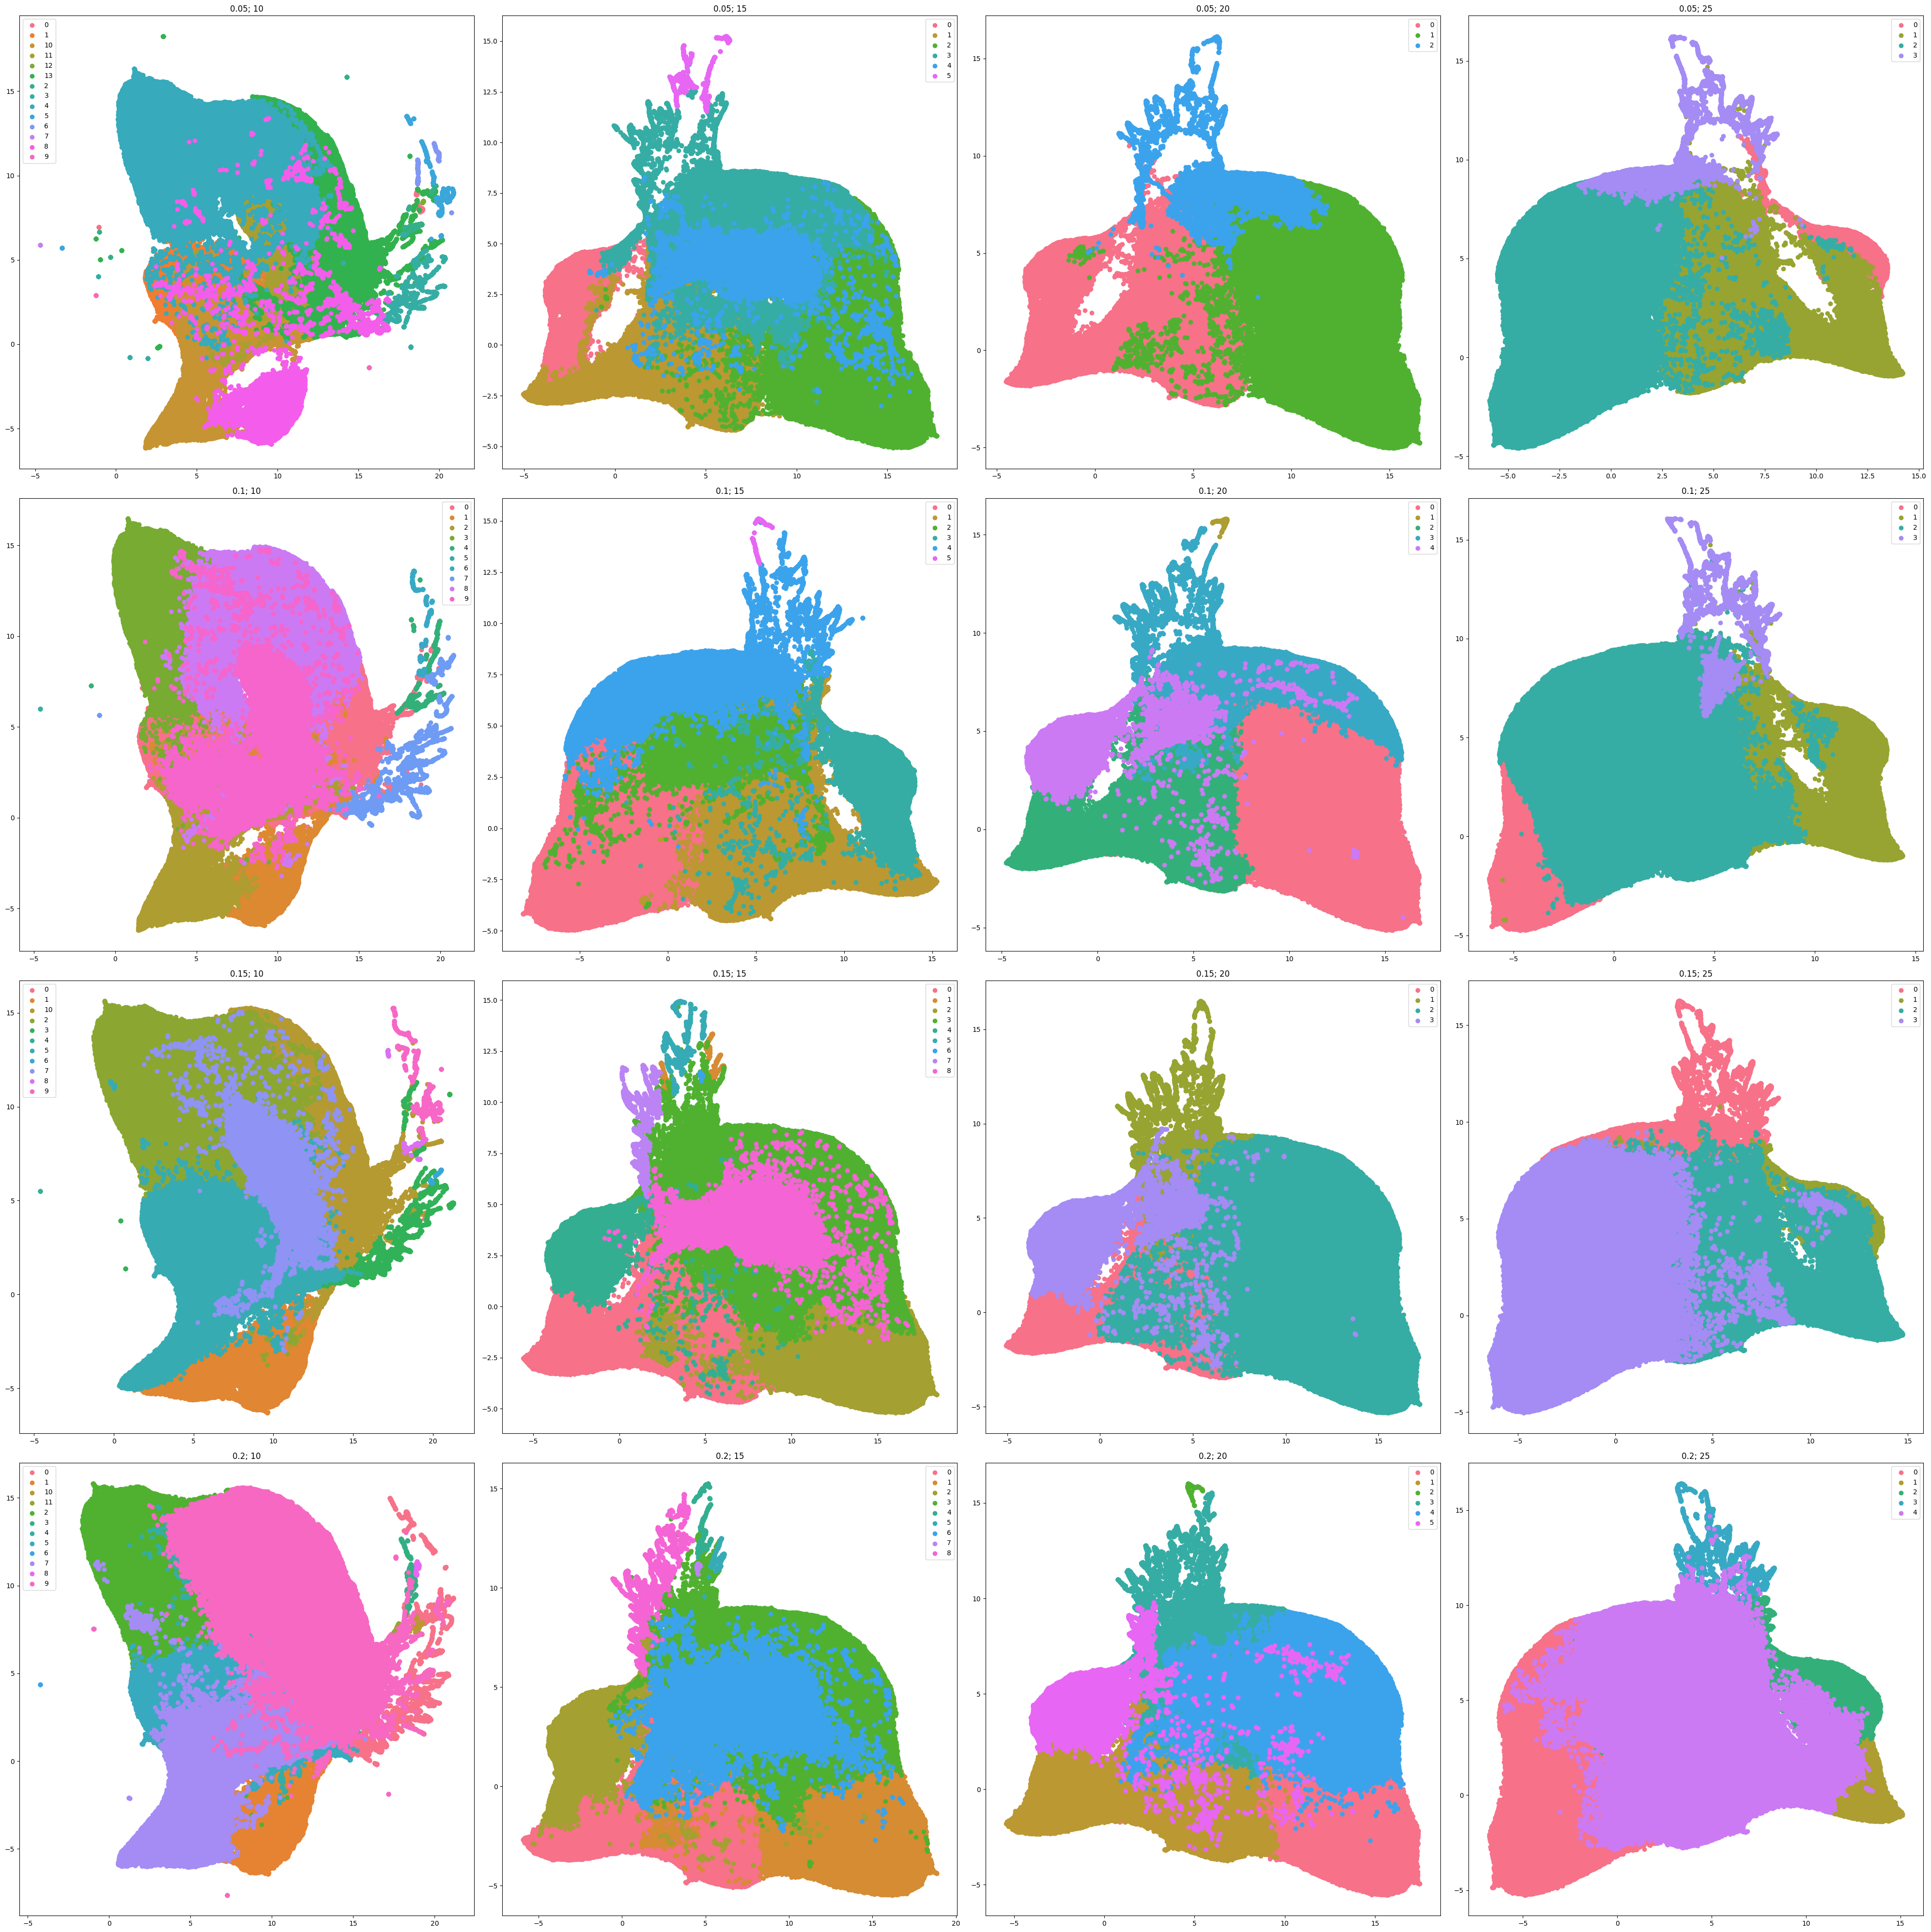

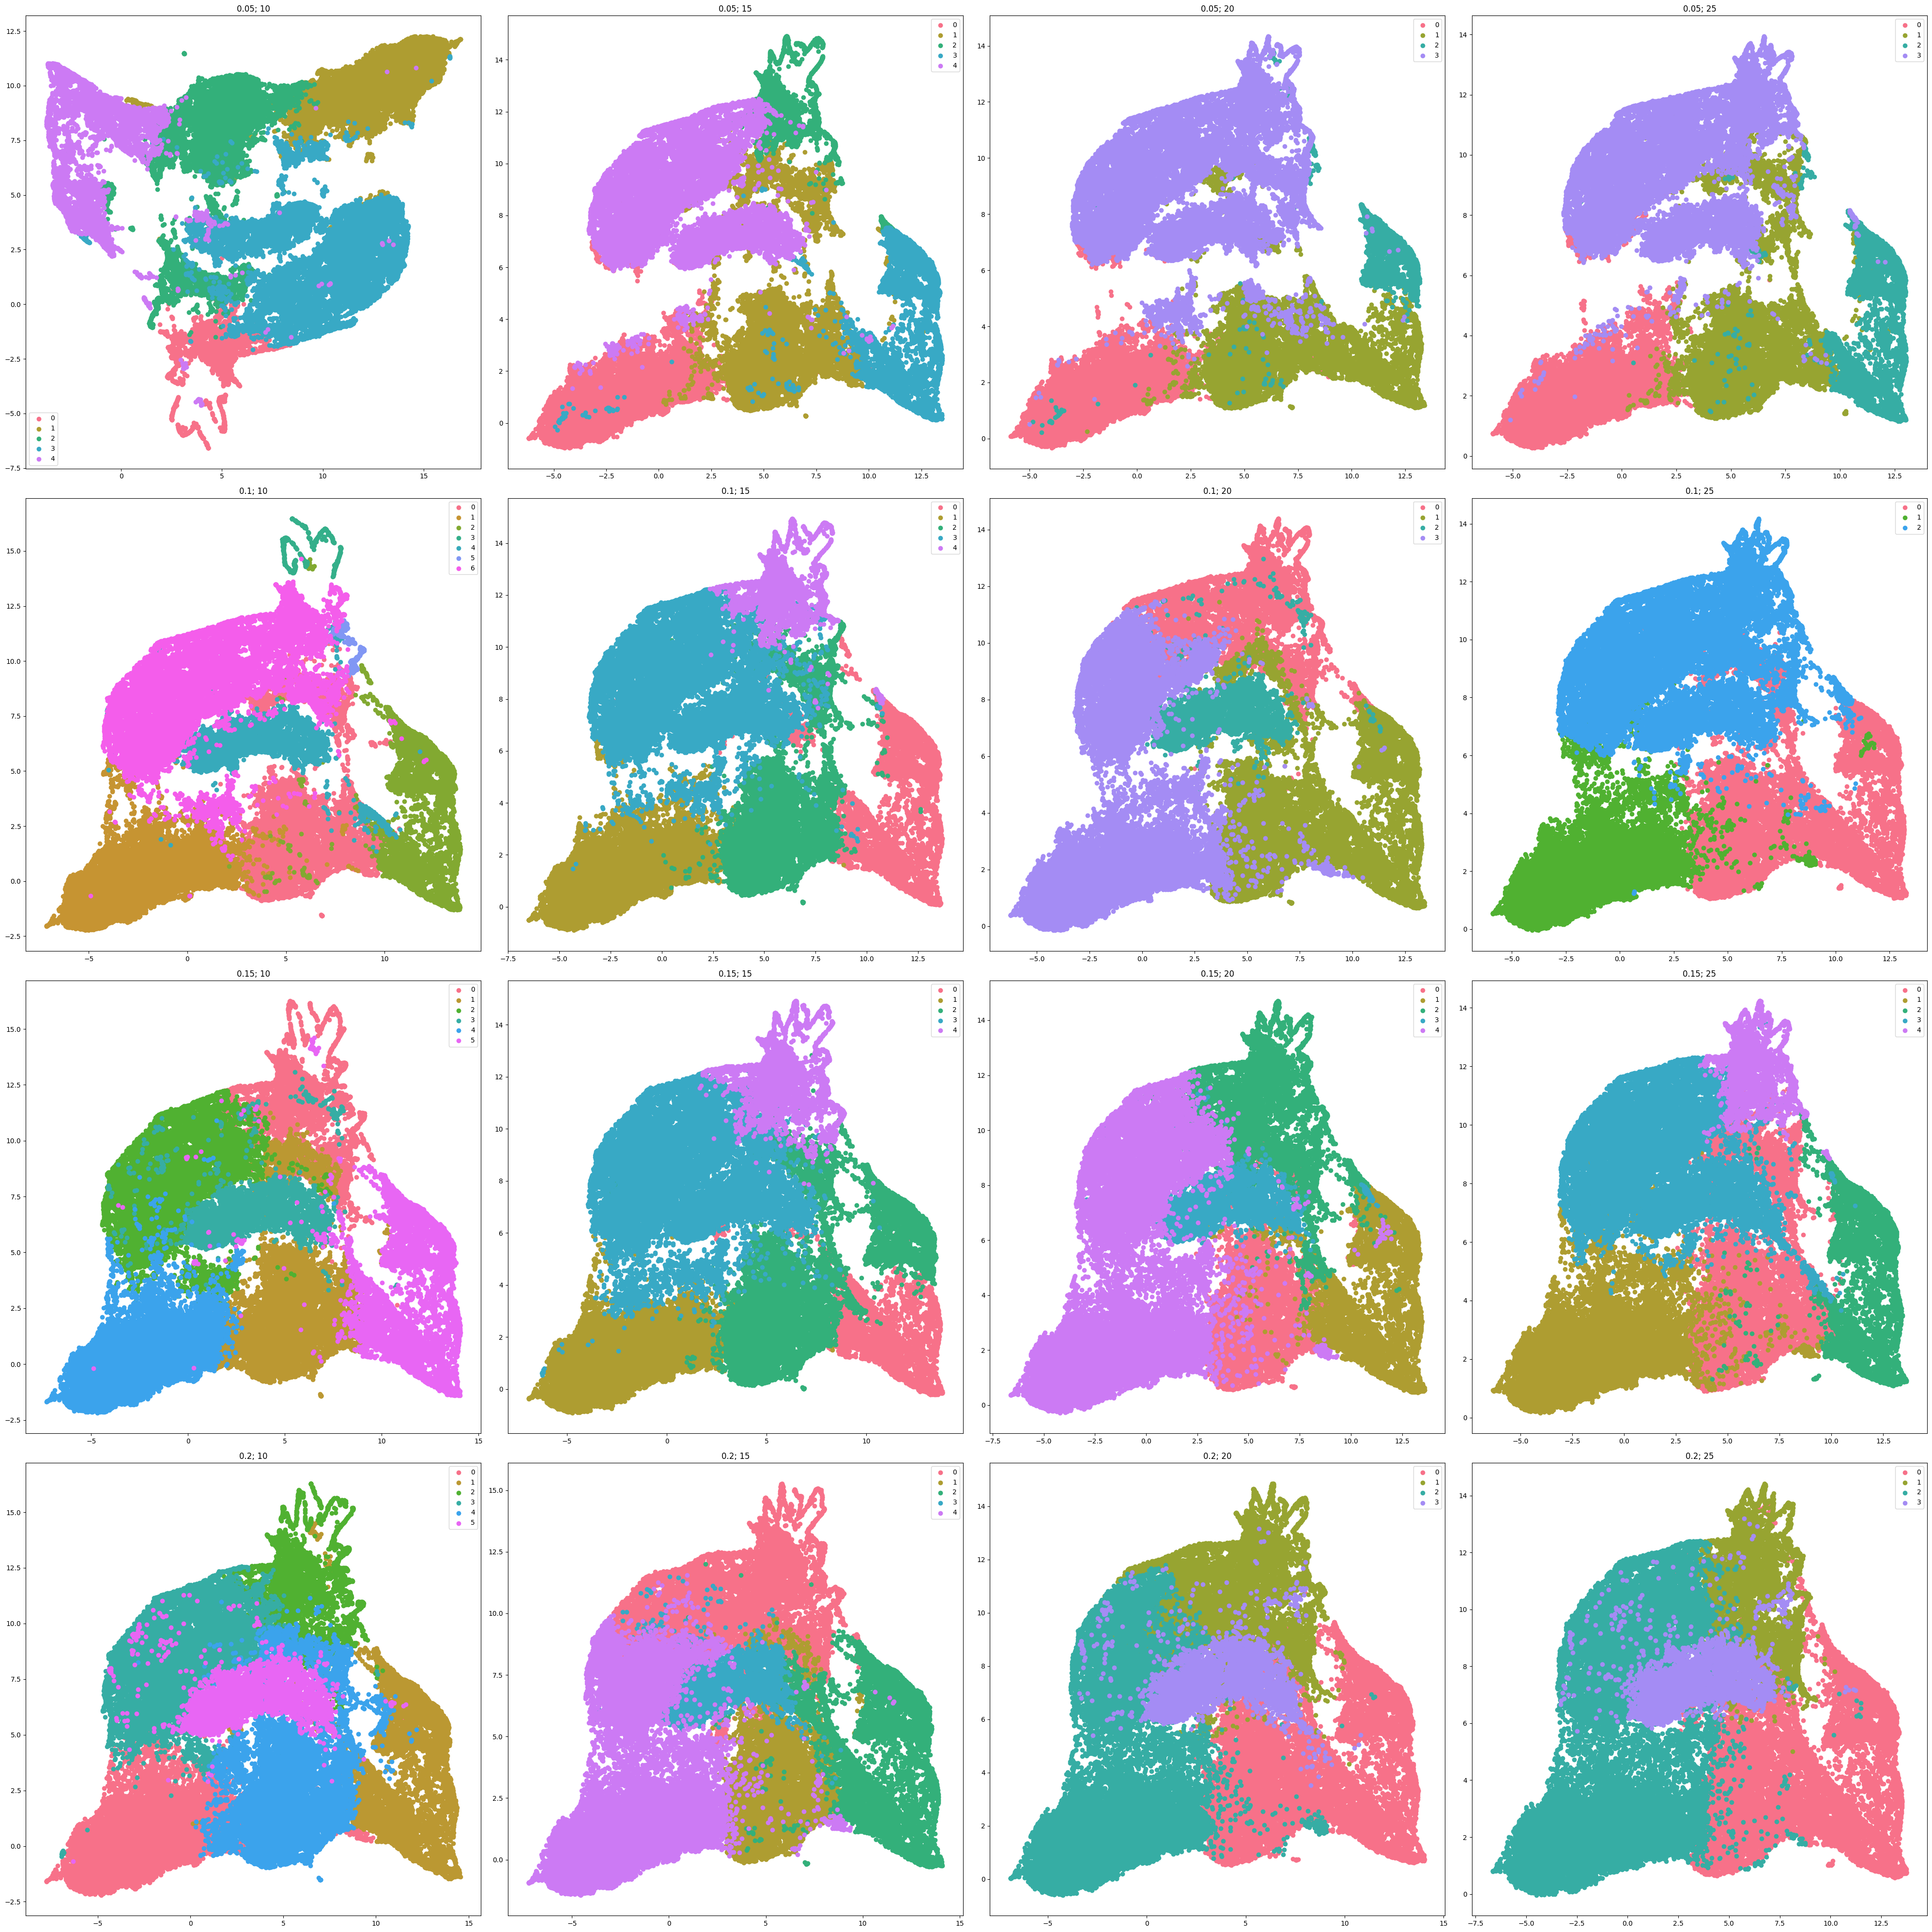

In [5]:
from laminatools import umap, plot
import matplotlib.pyplot as plt
import itertools as it
import numpy as np


for stringency, condition_data in embedding_subsets.items():
    print(stringency)
    df = umap.concatenate_condition_frames(
        condition_data
    )
    df = df.loc[:, ~df.columns.str.contains('LAP2alpha')]

    fig, axs = plt.subplots(4, 4)
    for (min_dist, n_neighbours), ax in zip(
        it.product(
            [0.05, 0.1, 0.15, 0.2], 
            [10, 15, 20, 25]
        ), 
        axs.reshape(16)
    ):
        print(min_dist, n_neighbours)
        embedding, umap_graph = umap.umap_embedding(
            np.log1p(df),
            # random_state = 427385,
            min_dist = min_dist,
            n_neighbors = n_neighbours
        )
        communities = umap.louvain_communities(umap_graph, 0.1)
        umap.add_community_annotation(embedding, communities, 'louvain')

        plot.plot_embedding_categorical(embedding, 'louvain', ax)
        ax.set_title(f'{min_dist}; {n_neighbours}')

    fig.set_figwidth(40)
    fig.set_figheight(40)
    fig.tight_layout()
    fig.savefig(f'../plots/genome_umap_parameter_search_lap2_{stringency}.png')

In [4]:
state_subsets = {}
for stringency, df in zip(['normal', 'stringent'], [lap2, lap2_stringent]):
    state_subsets[stringency] = {}
    idx = df.apply(
        lambda x: '{chrom}:{start}-{end}'.format(
            chrom = x['chrom'],
            start = x['start'],
            end = x['end']
        ),
        axis = 1
    )
    df.index = idx
    df = df.drop(columns = ['chrom', 'start', 'end', 'lap2'])
    for condition in conditions:
        keep_columns = [f'chromhmm_{i}' for i in range(5, 11)]
        subset = df.merge(
            embeddings[condition][5000].loc[:, keep_columns],
            left_index = True,
            right_index = True,
            how = 'inner'
        )
        state_subsets[stringency][condition] = subset.set_index('binid')
        
state_subsets['normal']['WT']

chromhmm_5 chromhmm_6 chromhmm_7 chromhmm_8 chromhmm_9 chromhmm_10
binid                                                                        
BIN_481440         E5         E5         E3         E6         E7          E7
BIN_481431         E5         E5         E3         E6         E7          E7
BIN_104648         E5         E5         E3         E6         E7          E7
BIN_326529         E5         E5         E3         E6         E7          E7
BIN_481439         E5         E5         E3         E6         E7          E7
...               ...        ...        ...        ...        ...         ...
BIN_106148         E2         E2         E6         E2         E2          E2
BIN_320057         E4         E4         E2         E7         E8          E9
BIN_240577         E4         E4         E2         E7         E8          E9
BIN_117788         E2         E2         E6         E2         E3          E2
BIN_371710         E5         E5         E3         E5         E6          E6

[150612 rows x 6 columns]

In [5]:
from laminatools import umap, plot
import numpy as np
import gc


# use_multiprocessing = False
# here we only compute 5000 upwards since spectral initialization of memory fails with 200, 1000 binsize
for stringency, condition_data in embedding_subsets.items():
    binsize_frame = umap.concatenate_condition_frames(
        condition_data,
        add_key_to_index = True
    )

    binsize_frame = np.log1p(binsize_frame)

    embedding_data = binsize_frame.drop(
        columns = binsize_frame.columns[binsize_frame.columns.str.contains('LAP2alpha')]
    )

    print('compute umap embedding')
    embedding, umap_graph = umap.umap_embedding(
        embedding_data,
        random_state = 427385,
        min_dist = 0.05,
        n_neighbors = 25
    )
    
    print('computing louvain communities')
    louvain_columns = umap.annotate_multiple_resolutions(
        embedding,
        umap_graph,
        [0.05, 0.1, 0.15, 0.2]
    )
    
    for condition in conditions:
        hdf_key = f'{stringency}_{condition}'
        
        condition_frame = condition_data[condition]
        state_frame = state_subsets[stringency][condition] 
        
        condition_embedding = embedding.loc[
            embedding.index.str.endswith(condition),
            :
        ]
        
        condition_embedding.index = [
            i.replace(f'_{condition}', '') for i in condition_embedding.index
        ]
        
        print('annotating embedding', condition)
        condition_embedding = pd.concat(
            [condition_embedding, state_frame, condition_frame],
            axis = 1,
            join = 'inner'
        )

        print('saving annotated embedding', condition)
        condition_embedding.to_hdf(
            '../embeddings_genome_lap2enriched.h5',
            hdf_key,
            mode = 'a'
        )

        print('plotting annotated embedding', condition)
        annotation_columns = (
            condition_frame.columns.to_list() + 
            state_frame.columns.to_list() + 
            louvain_columns
        )

        plot.plot_and_save_annotated_embedding(
            condition_embedding,
            annotation_columns,
            f'../plots/umap_{stringency}_{condition}_{binsize}.png'
        )

    del embedding, umap_graph
    gc.collect()

/users/daniel.malzl/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


compute umap embedding


/users/daniel.malzl/.local/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


computing louvain communities
annotating embedding WT
saving annotated embedding WT
plotting annotated embedding WT
annotating embedding KO
saving annotated embedding KO
plotting annotated embedding KO
compute umap embedding


/users/daniel.malzl/.local/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


computing louvain communities
annotating embedding WT
saving annotated embedding WT
plotting annotated embedding WT
annotating embedding KO
saving annotated embedding KO
plotting annotated embedding KO
